In [2]:
install.packages("PerformanceAnalytics")
install.packages("caret", dependencies = c("Depends", "Suggests"))    

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘varImp’, ‘BradleyTerry2’, ‘klaR’, ‘MLmetrics’, ‘party’, ‘themis’


Warning message in install.packages("caret", dependencies = c("Depends", "Suggests")):
“installation of package ‘BradleyTerry2’ had non-zero exit status”
Warning message in install.packages("caret", dependencies = c("Depends", "Suggests")):
“installation of package ‘klaR’ had non-zero exit status”
Warning message in install.packages("caret", dependencies = c("Depends", "Suggests")):
“installation of package ‘MLmetrics’ had non-zero exit status”
Warning message in install.packages("caret", dependencies = c("Depends", "Suggests")):
“installation of package ‘party’ had non-zero exit status”
Warning message in install.packages("caret", dependencies = c("Depends", "Suggests")):
“installation of package ‘themis’ had non-zero exit status”
Warning message in install.packages("caret", dependencies = c("Depends", "Su

In [4]:
require(caret)
library(PerformanceAnalytics)
library(MASS)
options(scipen = 999, digits = 3)
options(warn=-1)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




In [5]:
dataset <- read.csv("/home/jovyan/A_Dataset_Graph/features_rfm.csv", 
                    sep=",", dec = ".", stringsAsFactors=TRUE, 
                    na.strings = "NA", row.names = 1)

In [6]:
#####################################
# Exploratory Data Analysis and Preprocessing

head(dataset)
table(dataset$target)

str(dataset)

,user_id,registration,sign_in_count,last_sign_in_at,referral_token,shipping_cap,coupon_count,used_bonus_points,cash_count,card_count,paypal_count,service_wash_count,service_rent_count,flexy_count,rush_count,target
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,3,3060,7771,310,1,20122,2,0,3,0,0,3,0,3,0,0
1,15,3002,9,2045,0,20121,0,0,0,3,0,3,0,2,1,0
2,17,2997,9,1553,1,20124,0,0,0,0,2,2,0,2,0,0
3,20,2987,43,568,1,20129,0,0,1,1,0,2,0,2,0,1
4,24,2981,242,632,1,20156,0,20,9,6,0,15,0,14,1,0
5,30,2967,10,2723,1,20154,0,0,3,1,0,4,0,4,0,0



   0    1 
1833 1905 

'data.frame':	3738 obs. of  16 variables:
 $ user_id           : int  3 15 17 20 24 30 34 37 38 43 ...
 $ registration      : int  3060 3002 2997 2987 2981 2967 2961 2955 2954 2941 ...
 $ sign_in_count     : num  7771 9 9 43 242 ...
 $ last_sign_in_at   : int  310 2045 1553 568 632 2723 425 2872 561 651 ...
 $ referral_token    : int  1 0 1 1 1 1 1 0 1 0 ...
 $ shipping_cap      : num  20122 20121 20124 20129 20156 ...
 $ coupon_count      : int  2 0 0 0 0 0 0 0 0 0 ...
 $ used_bonus_points : int  0 0 0 0 20 0 0 0 0 0 ...
 $ cash_count        : num  3 0 0 1 9 3 0 0 1 0 ...
 $ card_count        : num  0 3 0 1 6 1 24 0 0 0 ...
 $ paypal_count      : num  0 0 2 0 0 0 0 1 0 1 ...
 $ service_wash_count: num  3 3 2 2 15 4 24 1 1 1 ...
 $ service_rent_count: num  0 0 0 0 0 0 0 0 0 0 ...
 $ flexy_count       : num  3 2 2 2 14 4 5 1 1 1 ...
 $ rush_count        : num  0 1 0 0 1 0 19 0 0 0 ...
 $ target            : int  0 0 0 1 0 0 1 0 0 0 ...


In [7]:
#separating user_id from dataset
client_id = dataset[1]
dataset$user_id <- NULL

In [8]:
#changing target from 0/1 to C0/C1 in order to have it categoriacal
dataset$target<-paste("c",dataset$target,sep="")

In [9]:
#setting taget as a categorial binary feature
dataset$target<-factor(dataset$target)

In [10]:
#setting shipping_cap as a categorial muticategry feature
dataset$shipping_cap<-factor(dataset$shipping_cap)
str(dataset)

'data.frame':	3738 obs. of  15 variables:
 $ registration      : int  3060 3002 2997 2987 2981 2967 2961 2955 2954 2941 ...
 $ sign_in_count     : num  7771 9 9 43 242 ...
 $ last_sign_in_at   : int  310 2045 1553 568 632 2723 425 2872 561 651 ...
 $ referral_token    : int  1 0 1 1 1 1 1 0 1 0 ...
 $ shipping_cap      : Factor w/ 47 levels "193","20080",..: 7 6 9 14 39 37 6 29 6 6 ...
 $ coupon_count      : int  2 0 0 0 0 0 0 0 0 0 ...
 $ used_bonus_points : int  0 0 0 0 20 0 0 0 0 0 ...
 $ cash_count        : num  3 0 0 1 9 3 0 0 1 0 ...
 $ card_count        : num  0 3 0 1 6 1 24 0 0 0 ...
 $ paypal_count      : num  0 0 2 0 0 0 0 1 0 1 ...
 $ service_wash_count: num  3 3 2 2 15 4 24 1 1 1 ...
 $ service_rent_count: num  0 0 0 0 0 0 0 0 0 0 ...
 $ flexy_count       : num  3 2 2 2 14 4 5 1 1 1 ...
 $ rush_count        : num  0 1 0 0 1 0 19 0 0 0 ...
 $ target            : Factor w/ 2 levels "c0","c1": 1 1 1 2 1 1 2 1 1 1 ...


In [11]:
#separating categorical and numerical features in two dataset

isfactor <- sapply(dataset, function(x) is.factor(x))
isfactor
factordata <- dataset[, isfactor]
str(factordata)

registration      sign_in_count    last_sign_in_at     referral_token 
             FALSE              FALSE              FALSE              FALSE 
      shipping_cap       coupon_count  used_bonus_points         cash_count 
              TRUE              FALSE              FALSE              FALSE 
        card_count       paypal_count service_wash_count service_rent_count 
             FALSE              FALSE              FALSE              FALSE 
       flexy_count         rush_count             target 
             FALSE              FALSE               TRUE

'data.frame':	3738 obs. of  2 variables:
 $ shipping_cap: Factor w/ 47 levels "193","20080",..: 7 6 9 14 39 37 6 29 6 6 ...
 $ target      : Factor w/ 2 levels "c0","c1": 1 1 1 2 1 1 2 1 1 1 ...


In [12]:
numeric <- sapply(dataset, function(x) is.numeric(x))
numeric <-dataset[, numeric]
str(numeric)

'data.frame':	3738 obs. of  13 variables:
 $ registration      : int  3060 3002 2997 2987 2981 2967 2961 2955 2954 2941 ...
 $ sign_in_count     : num  7771 9 9 43 242 ...
 $ last_sign_in_at   : int  310 2045 1553 568 632 2723 425 2872 561 651 ...
 $ referral_token    : int  1 0 1 1 1 1 1 0 1 0 ...
 $ coupon_count      : int  2 0 0 0 0 0 0 0 0 0 ...
 $ used_bonus_points : int  0 0 0 0 20 0 0 0 0 0 ...
 $ cash_count        : num  3 0 0 1 9 3 0 0 1 0 ...
 $ card_count        : num  0 3 0 1 6 1 24 0 0 0 ...
 $ paypal_count      : num  0 0 2 0 0 0 0 1 0 1 ...
 $ service_wash_count: num  3 3 2 2 15 4 24 1 1 1 ...
 $ service_rent_count: num  0 0 0 0 0 0 0 0 0 0 ...
 $ flexy_count       : num  3 2 2 2 14 4 5 1 1 1 ...
 $ rush_count        : num  0 1 0 0 1 0 19 0 0 0 ...


In [13]:
# 1. missing data

sapply(dataset, function(x)(sum(is.na(x))))
#there are no missing data so we do not need to delete observations with missing or impute them.

registration      sign_in_count    last_sign_in_at     referral_token 
                 0                  0                  0                  0 
      shipping_cap       coupon_count  used_bonus_points         cash_count 
                 0                  0                  0                  0 
        card_count       paypal_count service_wash_count service_rent_count 
                 0                  0                  0                  0 
       flexy_count         rush_count             target 
                 0                  0                  0

In [14]:
#2. collinearity

R=cor(numeric)
R

,registration,sign_in_count,last_sign_in_at,referral_token,coupon_count,used_bonus_points,cash_count,card_count,paypal_count,service_wash_count,service_rent_count,flexy_count,rush_count
registration,1.00000,0.1019,-0.05644,0.05272,0.07625,0.1131,0.17306,0.2086,0.1704,0.3201,0.00581,0.2926,0.07524
sign_in_count,0.10191,1.0000,-0.16602,0.20421,0.03458,0.0665,0.10557,0.2159,0.1704,0.2748,-0.01402,0.2377,0.12179
last_sign_in_at,-0.05644,-0.1660,1.00000,-0.57819,-0.00638,-0.0505,0.01186,-0.0714,-0.1146,-0.0853,0.07704,-0.0532,-0.00858
referral_token,0.05272,0.2042,-0.57819,1.00000,0.00944,0.0443,0.02542,0.1005,0.1358,0.1367,-0.06865,0.1061,-0.00758
coupon_count,0.07625,0.0346,-0.00638,0.00944,1.00000,0.0290,0.31267,0.0668,-0.0135,0.3440,0.03291,0.3312,0.01670
used_bonus_points,0.11306,0.0665,-0.05045,0.04430,0.02897,1.0000,0.07388,0.1033,0.1089,0.2137,0.26128,0.2812,0.04951
cash_count,0.17306,0.1056,0.01186,0.02542,0.31267,0.0739,1.00000,0.0422,-0.0209,0.5435,-0.00251,0.4828,0.20649
card_count,0.20865,0.2159,-0.07144,0.10055,0.06684,0.1033,0.04218,1.0000,0.0312,0.6703,0.18924,0.6570,0.27485
paypal_count,0.17044,0.1704,-0.11461,0.13578,-0.01349,0.1089,-0.02093,0.0312,1.0000,0.4183,-0.01074,0.3744,0.11319
service_wash_count,0.32013,0.2748,-0.08529,0.13669,0.34399,0.2137,0.54351,0.6703,0.4183,1.0000,0.13892,0.9345,0.39380


In [15]:
correlatedPredictors = findCorrelation(R, cutoff = 0.95, names = TRUE)
print('Highly correlated features at index: ') 
print(correlatedPredictors)
summary(R[upper.tri(R)])


[1] "Highly correlated features at index: "
character(0)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.578   0.010   0.103   0.138   0.232   0.934 

png 
  2

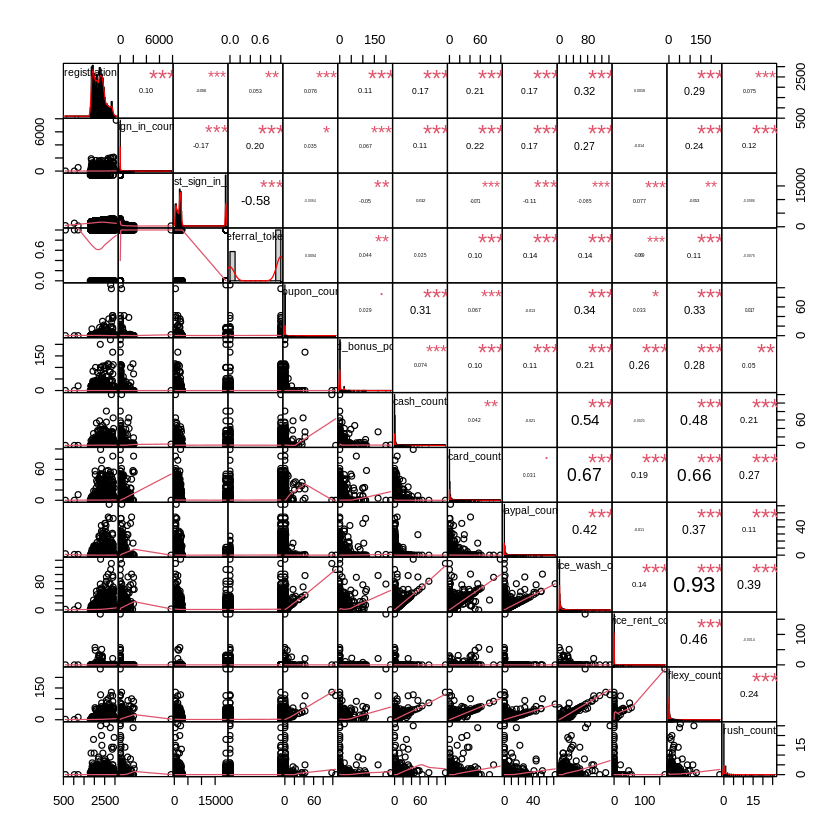

In [16]:
# visualize the correlation plot
chart.Correlation(numeric, method = "pearson", histogram=TRUE, pch=22, height=1500, width=1500)

# Save the plot
jpeg("rplot.jpg", width = 1500, height = 1500)
chart.Correlation(numeric, method = "pearson", histogram=TRUE, pch=22, height=1500, width=1500)
dev.off()

In [17]:
# removing the feature with collinearity -> registration
numeric_sel = numeric [,-1]
str(numeric_sel)

'data.frame':	3738 obs. of  12 variables:
 $ sign_in_count     : num  7771 9 9 43 242 ...
 $ last_sign_in_at   : int  310 2045 1553 568 632 2723 425 2872 561 651 ...
 $ referral_token    : int  1 0 1 1 1 1 1 0 1 0 ...
 $ coupon_count      : int  2 0 0 0 0 0 0 0 0 0 ...
 $ used_bonus_points : int  0 0 0 0 20 0 0 0 0 0 ...
 $ cash_count        : num  3 0 0 1 9 3 0 0 1 0 ...
 $ card_count        : num  0 3 0 1 6 1 24 0 0 0 ...
 $ paypal_count      : num  0 0 2 0 0 0 0 1 0 1 ...
 $ service_wash_count: num  3 3 2 2 15 4 24 1 1 1 ...
 $ service_rent_count: num  0 0 0 0 0 0 0 0 0 0 ...
 $ flexy_count       : num  3 2 2 2 14 4 5 1 1 1 ...
 $ rush_count        : num  0 1 0 0 1 0 19 0 0 0 ...


In [18]:
# create an unique dataset with numeric and factor variabiles
all=cbind(numeric_sel,factordata)
head(all,n=10)

,sign_in_count,last_sign_in_at,referral_token,coupon_count,used_bonus_points,cash_count,card_count,paypal_count,service_wash_count,service_rent_count,flexy_count,rush_count,shipping_cap,target
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
0,7771,310,1,2,0,3,0,0,3,0,3,0,20122,c0
1,9,2045,0,0,0,0,3,0,3,0,2,1,20121,c0
2,9,1553,1,0,0,0,0,2,2,0,2,0,20124,c0
3,43,568,1,0,0,1,1,0,2,0,2,0,20129,c1
4,242,632,1,0,20,9,6,0,15,0,14,1,20156,c0
5,10,2723,1,0,0,3,1,0,4,0,4,0,20154,c0
6,85,425,1,0,0,0,24,0,24,0,5,19,20121,c1
7,1,2872,0,0,0,0,0,1,1,0,1,0,20145,c0
8,40,561,1,0,0,1,0,0,1,0,1,0,20121,c0


In [19]:
# 3. Non Zero-Variance

nzv = nearZeroVar(all, saveMetrics = TRUE)
nzv

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
sign_in_count,1.21,11.2360,FALSE,FALSE
last_sign_in_at,52.50,41.6533,FALSE,FALSE
referral_token,1.74,0.0535,FALSE,FALSE
coupon_count,1.19,0.6688,FALSE,FALSE
used_bonus_points,12.79,1.3644,FALSE,FALSE
cash_count,1.69,1.2841,FALSE,FALSE
card_count,2.73,1.4179,FALSE,FALSE
paypal_count,5.47,1.0433,FALSE,FALSE
service_wash_count,3.18,1.8459,FALSE,FALSE


In [20]:
# removing the feature with no variance -> service_rent_count
dataset_sel = all [,-10]
str(dataset_sel)

'data.frame':	3738 obs. of  13 variables:
 $ sign_in_count     : num  7771 9 9 43 242 ...
 $ last_sign_in_at   : int  310 2045 1553 568 632 2723 425 2872 561 651 ...
 $ referral_token    : int  1 0 1 1 1 1 1 0 1 0 ...
 $ coupon_count      : int  2 0 0 0 0 0 0 0 0 0 ...
 $ used_bonus_points : int  0 0 0 0 20 0 0 0 0 0 ...
 $ cash_count        : num  3 0 0 1 9 3 0 0 1 0 ...
 $ card_count        : num  0 3 0 1 6 1 24 0 0 0 ...
 $ paypal_count      : num  0 0 2 0 0 0 0 1 0 1 ...
 $ service_wash_count: num  3 3 2 2 15 4 24 1 1 1 ...
 $ flexy_count       : num  3 2 2 2 14 4 5 1 1 1 ...
 $ rush_count        : num  0 1 0 0 1 0 19 0 0 0 ...
 $ shipping_cap      : Factor w/ 47 levels "193","20080",..: 7 6 9 14 39 37 6 29 6 6 ...
 $ target            : Factor w/ 2 levels "c0","c1": 1 1 1 2 1 1 2 1 1 1 ...


In [21]:
# 4. transformation and scaling

dataset_scaled <- preProcess(dataset_sel, method = c("scale", "BoxCox"))
dataset_scaled
# the method Box-Cox transformation has transformed a feature: last_sign_in_at
# the method scale has scaled 123 features and ignored the two categorical variables

Created from 3738 samples and 13 variables

Pre-processing:
  - Box-Cox transformation (1)
  - ignored (2)
  - scaled (11)

Lambda estimates for Box-Cox transformation:
-0.2

In [22]:
ls(dataset_scaled)

[1] "bagImp"            "bc"                "data"             
 [4] "dim"               "et"                "ica"              
 [7] "invHyperbolicSine" "k"                 "knnSummary"       
[10] "mean"              "median"            "method"           
[13] "numComp"           "pcaComp"           "rangeBounds"      
[16] "ranges"            "rotation"          "std"              
[19] "thresh"            "wildcards"         "yj"

In [23]:
dataset_scaled$bc

$last_sign_in_at
Box-Cox Transformation

3738 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    298     986    1931    4465    2364   18976 

Largest/Smallest: 63.7 
Sample Skewness: 1.73 

Estimated Lambda: -0.2 
With fudge factor, Lambda = 0 will be used for transformations



In [24]:
# adding the data to the scale object  
dataset_sel_scaled=predict(dataset_scaled, newdata = all)
head(dataset_sel_scaled)

,sign_in_count,last_sign_in_at,referral_token,coupon_count,used_bonus_points,cash_count,card_count,paypal_count,service_wash_count,service_rent_count,flexy_count,rush_count,shipping_cap,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
0,35.1271,4.91,2.08,0.658,0.00,0.616,0.000,0.00,0.311,0,0.291,0.000,20122,c0
1,0.0407,6.53,0.00,0.000,0.00,0.000,0.439,0.00,0.311,0,0.194,0.782,20121,c0
2,0.0407,6.29,2.08,0.000,0.00,0.000,0.000,0.51,0.207,0,0.194,0.000,20124,c0
3,0.1944,5.43,2.08,0.000,0.00,0.205,0.146,0.00,0.207,0,0.194,0.000,20129,c1
4,1.0939,5.52,2.08,0.000,1.81,1.849,0.879,0.00,1.554,0,1.359,0.782,20156,c0
5,0.0452,6.77,2.08,0.000,0.00,0.616,0.146,0.00,0.415,0,0.388,0.000,20154,c0


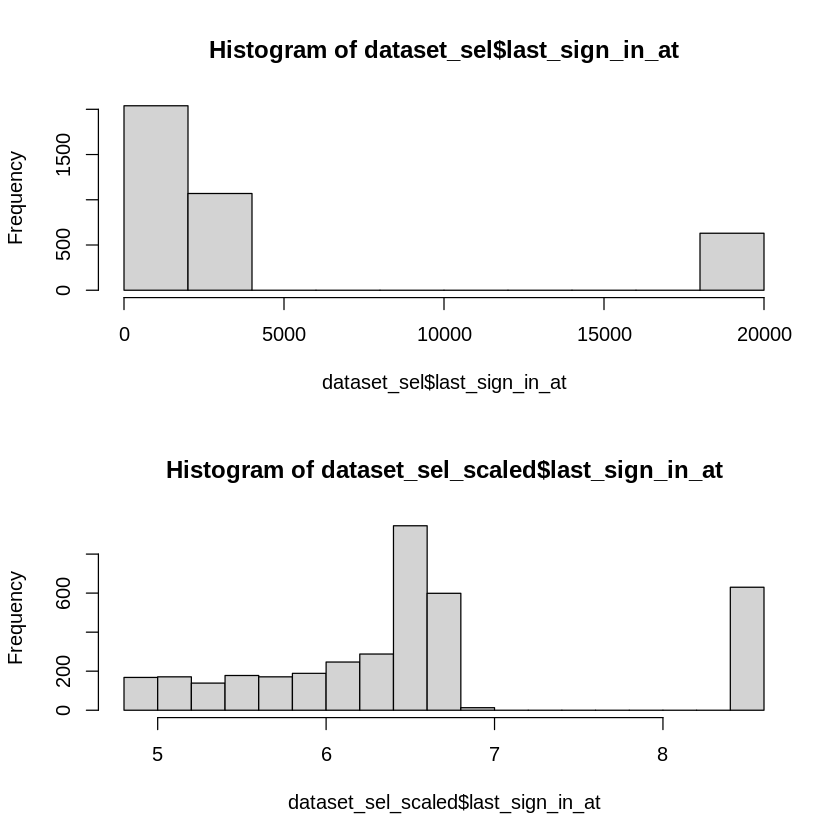

In [28]:
#comparing the distribution in the transformed feature
#setting e two way plotting areas in the plots window
par(mfrow=c(2,1))

hist(dataset_sel$last_sign_in_at)
hist(dataset_sel_scaled$last_sign_in_at)

#taking back the plots window to standard
par(mfrow=c(1,1))


In [29]:
# 5. Features Selection through regression model with step AIC procedure

fit <- glm(target~. , data=dataset_sel_scaled, family="binomial")
summary(fit)
step <- stepAIC(fit, direction="both")



Call:
glm(formula = target ~ ., family = "binomial", data = dataset_sel_scaled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6173  -1.0383   0.0003   1.0937   1.9862  

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error z value             Pr(>|z|)    
(Intercept)          19.3124  2399.5448    0.01              0.99358    
sign_in_count         0.0406     0.0493    0.82              0.40966    
last_sign_in_at      -0.4482     0.0514   -8.72 < 0.0000000000000002 ***
referral_token        0.0189     0.0462    0.41              0.68163    
coupon_count         -0.0607     0.0776   -0.78              0.43404    
used_bonus_points    -0.1351     0.0466   -2.90              0.00375 ** 
cash_count            0.0766     0.2053    0.37              0.70901    
card_count            0.0364     0.2790    0.13              0.89624    
paypal_count          0.1131     0.1710    0.66              0.50824    
service_wash_count 

Start:  AIC=4522
target ~ sign_in_count + last_sign_in_at + referral_token + coupon_count + 
    used_bonus_points + cash_count + card_count + paypal_count + 
    service_wash_count + service_rent_count + flexy_count + rush_count + 
    shipping_cap


Step:  AIC=4522
target ~ sign_in_count + last_sign_in_at + referral_token + coupon_count + 
    used_bonus_points + cash_count + card_count + paypal_count + 
    service_wash_count + service_rent_count + flexy_count + shipping_cap

                     Df Deviance  AIC
- card_count          1     4406 4520
- cash_count          1     4407 4521
- referral_token      1     4407 4521
- paypal_count        1     4407 4521
- coupon_count        1     4407 4521
- sign_in_count       1     4407 4521
<none>                      4406 4522
- used_bonus_points   1     4415 4529
- flexy_count         1     4432 4546
- service_wash_count  1     4438 4552
- service_rent_count  1     4451 4565
- last_sign_in_at     1     4484 4598
- shipping_cap       4

In [35]:
# training of a glm model with the features selected by the sep AIC process
set.seed(1234)
Control=trainControl(method= "cv", number=5,  classProbs = TRUE)

glm_aicPP = train(target ~ last_sign_in_at + used_bonus_points + service_wash_count + 
    service_rent_count + flexy_count , data=dataset_sel_scaled ,  method = "glm", trControl = Control)


In [36]:
confusionMatrix(glm_aicPP)
summary(glm_aicPP)

Cross-Validated (5 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction   c0   c1
        c0 33.9 21.9
        c1 15.1 29.1
                            
 Accuracy (average) : 0.6297



Call:
NULL

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.614  -1.080   0.168   1.131   1.877  

Coefficients:
                   Estimate Std. Error z value             Pr(>|z|)    
(Intercept)          2.5181     0.2483   10.14 < 0.0000000000000002 ***
last_sign_in_at     -0.4298     0.0372  -11.56 < 0.0000000000000002 ***
used_bonus_points   -0.1566     0.0441   -3.55              0.00038 ***
service_wash_count   3.6013     0.5720    6.30        0.00000000031 ***
service_rent_count   0.5520     0.1225    4.51        0.00000661789 ***
flexy_count         -3.2074     0.6206   -5.17        0.00000023679 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5180.6  on 3737  degrees of freedom
Residual deviance: 4740.2  on 3732  degrees of freedom
AIC: 4752

Number of Fisher Scoring iterations: 7


In [ ]:
#update